In [ ]:
# Plot partial response cohorts with consistently formatted key

# Latest draft of TMP
https://docs.google.com/document/d/1LgIEkQ_pV7uQacI4SDf1Je-Ttk7d-1d2HlGrhMKuDfQ/edit

In [ ]:
# From v5.1_loop_keys_devel:
# loop key v2 version
# Key elements placed off of lower left corner of key box


In [1]:
import pandas as pd
import json
from statistics import mean
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import json
from scipy import stats
import matplotlib
import matplotlib.patches as patches

In [2]:
colors = pd.read_csv('data/TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

sample_response_DF = pd.read_csv('data/sample_response_DF_20210805.tsv',
                                          sep = '\t')

In [3]:
lower = [0,-1000,-1] # Define bounds
upper = [.5,1000,0]
# Define function, use to make 100 predictions at sample sizes 80 to 250
def Y_acc(x, a, b, c):
    Y_acc = (1-a)-b*x**c
    return Y_acc

In [4]:
# Make a Burr12 prediction for each of the 11 partial response cohorts at each of these sample sizes
prediction_samples = [80,90,100,
         110,120,130,140,150,160,170,180,
         190,200,210,220,230,240,250]

In [5]:
partial_response_cohorts_to_predict = [('ACC', 0), # index corresponds to sample_response_DF
                        ('CESC', 3),
                        ('ESCC', 5),
                        ('KIRP', 9),
                        ('MESO', 14),
                        ('PAAD', 16),
                        ('PCPG', 17),
                        ('SARC', 19),
                        ('TGCT', 21),
                        ('THYM', 23),
                        ('UVM', 25),]

In [6]:
title_list = [ # To v5
    'Adrenocortical carcinoma',
    'Cervical squamous cell carcinoma',
    'Esophageal carcinoma',
    'Kidney renal papillary cell carcinoma',
    'Mesothelioma',
    'Pancreatic adenocarcinoma',
    'Pheochromocytoma and Paraganglioma',
    'Sarcoma',
    'Testicular Germ Cell Tumors',
    'Thymoma',
    'Uveal Melanoma'
]

In [7]:
# Build raw predictions object from sample response dataframe
# Originally from 4.2 (first working version for reference)
# Make inverse power law predictions for 11 undersampled cohorts
partial_response_cohort_list = []
observed_means = [] # inspected for v 5.1
observed_raws = [] # inspected for v 5.1
raw_predictions = {} # To DF for version 5.1

for cohort_tuple in partial_response_cohorts_to_predict: # Iterate list of partial response cohorts and tuples

    cohort = cohort_tuple[0]
    partial_response_cohort_list.append(cohort) # To index for DF build to json write, done 4.2
    print(cohort)
    cohort_index = cohort_tuple[1] # to json converter
    
    accuracy_response_dct = {
        int(k):[i for i in v] for k,v in json.loads( # json
        sample_response_DF.iloc[cohort_index,1]).items()
    }
    accuracy_response = sorted(accuracy_response_dct.items())
    
    full_samples = [] # to green dots on plot (update note, not green in this version)
    observed_mean_scores = [] # averages, previously full_scores
    observed_raw_scores = [] # list of 100 raw score lists per sample size, put in observed_raws
  
    for i in list(range(0, len(accuracy_response))): # want for overlap on plot
        full_samples.append(accuracy_response[i][0])
        mean_score = mean(accuracy_response[i][1]) # taking mean of raw scores
        observed_mean_scores.append(mean_score) # previously full_scores
        observed_raw_scores.append(accuracy_response[i][1])
    
    observed_means.append(
        (cohort,
        full_samples,
        observed_mean_scores)
    )
    
    observed_raws.append( # fill with tuples
        (cohort,
        full_samples,
        observed_raw_scores)
    )

    sample_max = 14 # smp sz 75 (actually 70?)
    sample_min = 6 # smp sz 35

    fitting_samples = [] # This is 35 to 70 range
    fitting_scores = []
    
    for i in list(range(sample_min, sample_max)): # Iterate fitting region
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this sample step size
    
    prediction_dict = {}
    
    for resampling_idx in list(range(0,100)): # run the inverse power function 100 times

        scores_temp = [] # 8 scores for each resampling on fitting window sample sizes

        for tuple_n in accuracy_response[sample_min:sample_max]: # sorted dict, iterate 8 fitting window keys
            
            scores_temp.append(tuple_n[1][resampling_idx]) # Pull nth item from 100 score list value for each sample size in fitting window

        front_end_param_set_n, _ = curve_fit( # Set parameters for each of 100 resamplings
            Y_acc, # inverse power function, set front-end parameters 100 times
            fitting_samples,
            scores_temp,
            bounds=[lower,upper]
        )
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n)
        
        prediction_dict[resampling_idx] = y_predict
    
    raw_predictions[cohort] = prediction_dict
    
raw_predictions_DF = pd.DataFrame(raw_predictions)    
#     break       
print('done')

ACC
CESC
ESCC
KIRP
MESO
PAAD
PCPG
SARC
TGCT
THYM
UVM
done


In [ ]:
partial_colors = colors[colors.Cohort.isin(partial_response_cohort_list)]

In [10]:
# Upload indivdual plots to figure drive

In [ ]:
# Key formatting method
    # Set box proportion factor for consistency between plots
    # Set interior key element positions with proportion factor

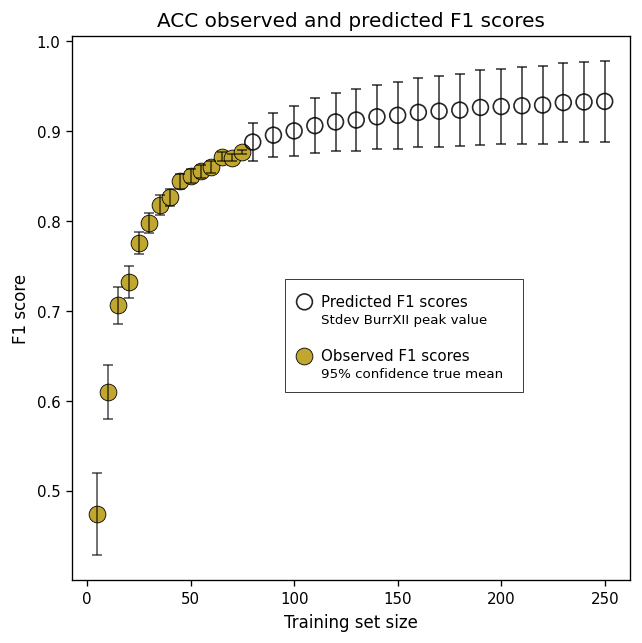

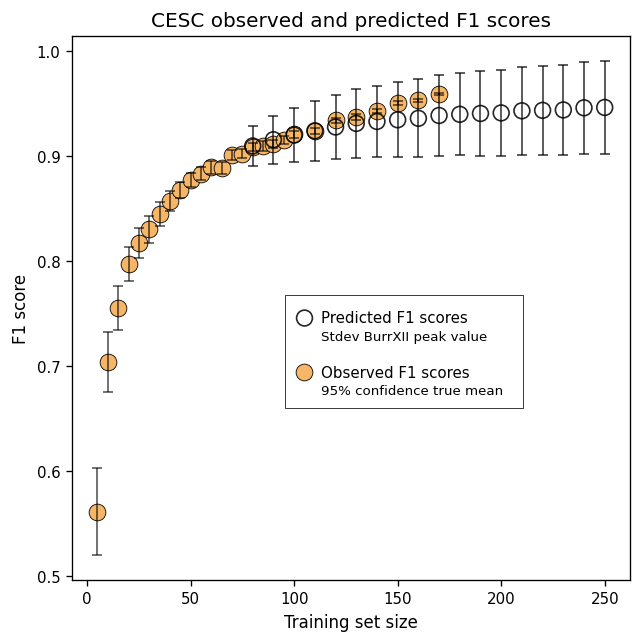

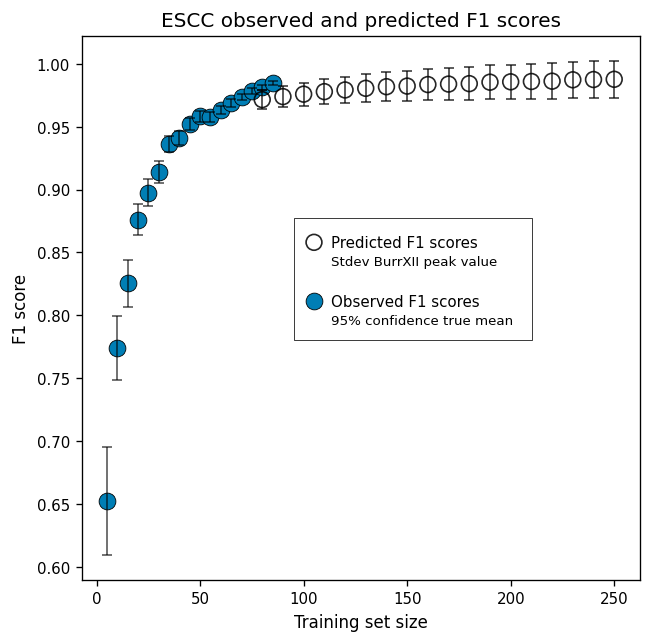

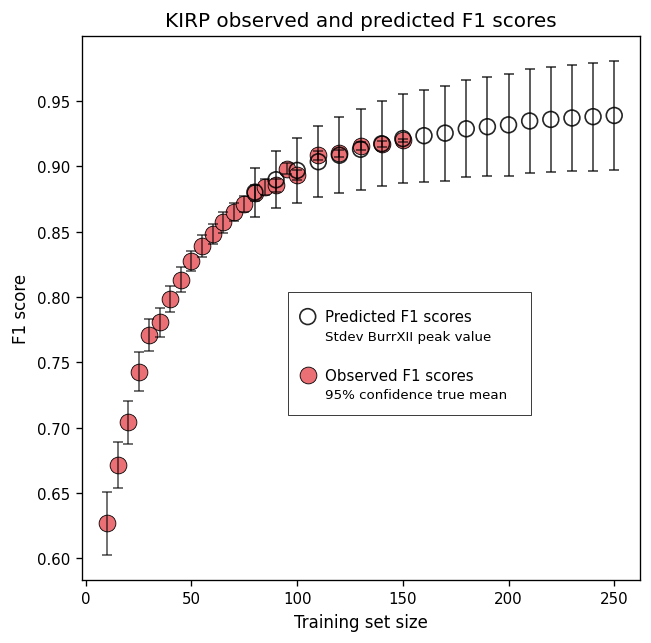

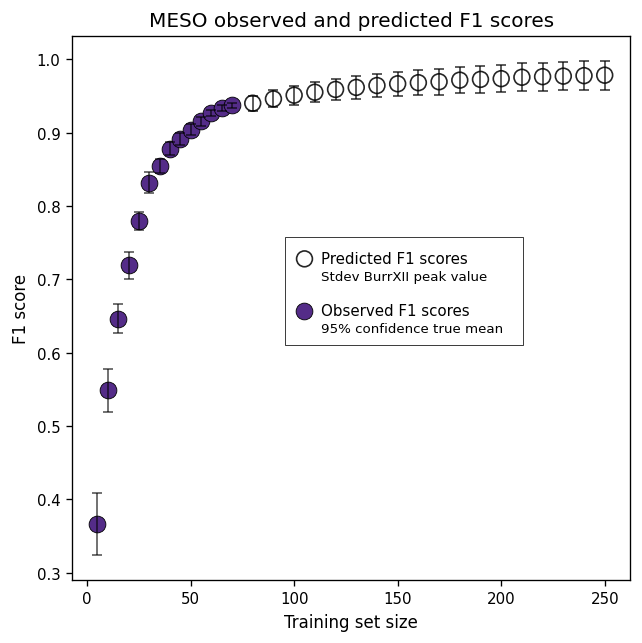

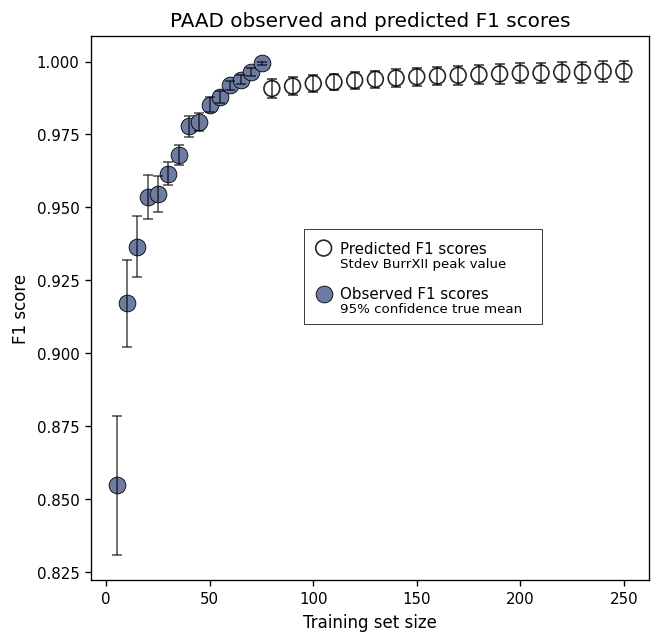

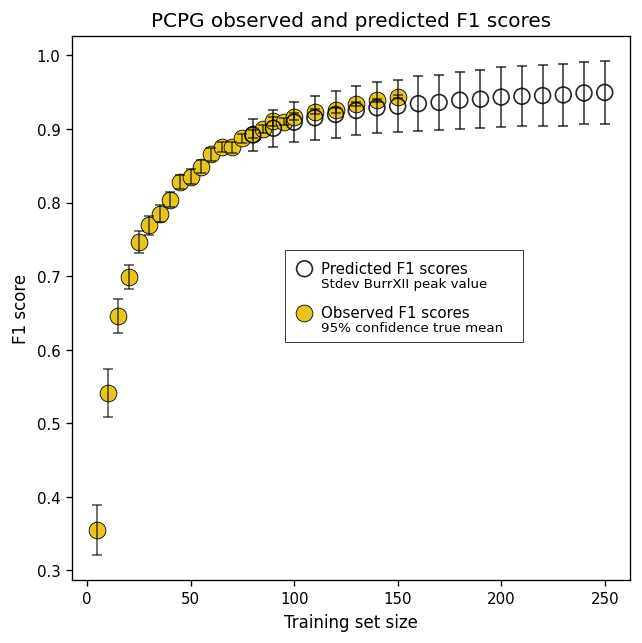

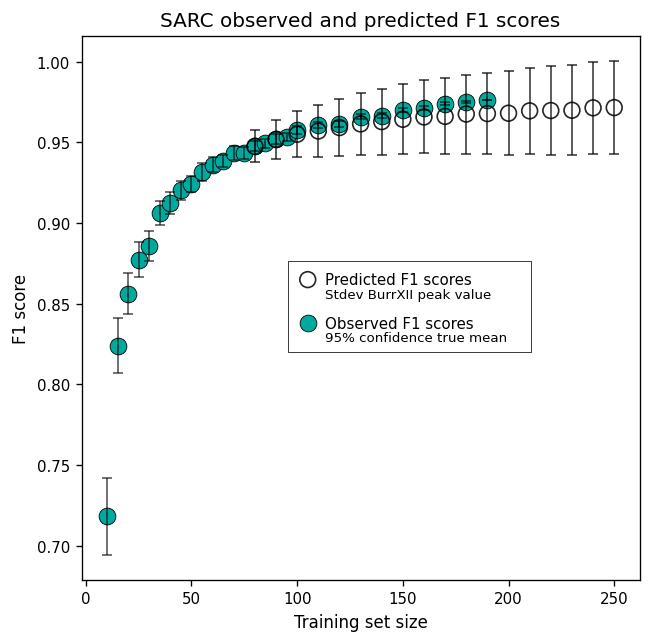

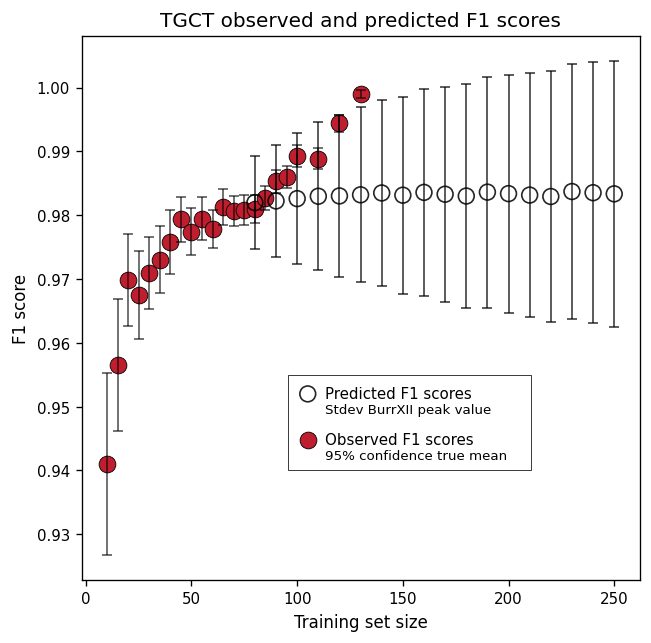

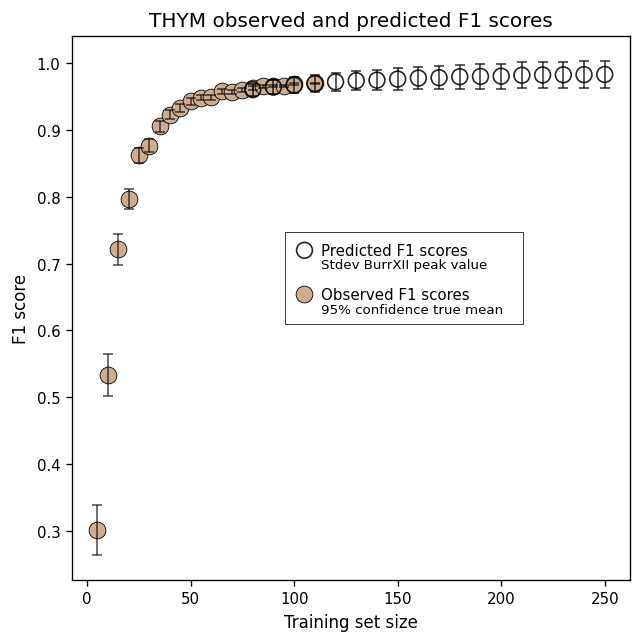

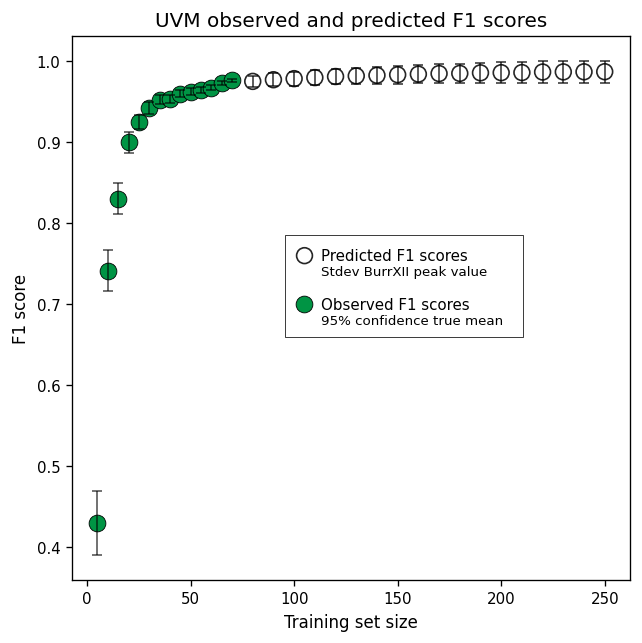

In [46]:
# Plot, main: version: loop_keys_devel
cohort_index_list = list(range(0, 11))
# cohort_index_list = [10] # Toggle cohorts (devel mode)
dist = getattr(stats, 'burr12')
n = 100
z = 1.96

obs_alph = 1
prd_alph = .85 # prediction dot alpha
dot_sz = 90
obs_sz = 101

for cohort_index in cohort_index_list:
    cohort = partial_response_cohort_list[cohort_index]
    
    observed_CI = []
    prediction_CI = []
    prediction_stdev = []

    peak_val_list = [] # list of peak values for 18 sample sizes

    fig, ax = plt.subplots(figsize = (6,6), dpi = 120)

    ax.scatter(
        observed_means[cohort_index][1],
        observed_means[cohort_index][2],
        color = partial_colors.iloc[cohort_index, 1],
        alpha = obs_alph,
        edgecolors='k',linewidth=.5,
        s = obs_sz
    )

    for i in observed_raws[cohort_index][2]:
        s = statistics.stdev(i)
        observed_CI.append(z * (s/math.sqrt(n)))    

    ax.errorbar( # Observed error bars
        observed_raws[cohort_index][1],
        observed_means[cohort_index][2],
        yerr = observed_CI,
        ecolor = 'black',
        ls = '',
        elinewidth = 1,
        capthick = 1,
        capsize = 3,
        alpha = .65
    )

    for j in list(range(0,18)): # j corresponds to score index for the 18 sample sizes

        scores_at_sample_size_n = []

        for i in raw_predictions_DF.index: # i is 100 resampling indexes
            scores_at_18_sample_sizes = raw_predictions_DF.iloc[i, cohort_index]
            score_at_smp_sz_n = scores_at_18_sample_sizes[j] # step through sample sizes
            scores_at_sample_size_n.append(score_at_smp_sz_n)

        xbar = statistics.mean(scores_at_sample_size_n)
        s = statistics.stdev(scores_at_sample_size_n)
        prediction_stdev.append(s)
        prediction_CI.append(z * (s/math.sqrt(n)))

        a, b = dist.fit(scores_at_sample_size_n, floc=0, fscale=1)[:2]

        mxlst = list(
            dist.pdf(
                np.linspace(
                    min(
                        scores_at_sample_size_n),
                    max(
                        scores_at_sample_size_n),
                    100),
                a,
                b
            )
        )

        mxv = max(mxlst) # Peak value of BurrXII curve
        x_ndx = mxlst.index(mxv)
        xlst = np.linspace(min(scores_at_sample_size_n), max(scores_at_sample_size_n), 100)

        peak_val_list.append(xlst[x_ndx])

    ax.scatter(
        prediction_samples, # pre defined
        peak_val_list,
        color = 'none',
        alpha = prd_alph,
        edgecolors='k',
        s = dot_sz
    )

    ax.errorbar(
        prediction_samples,
        peak_val_list,
        yerr = prediction_stdev,
        ecolor = 'black',
        ls = '',
        elinewidth = 1,
        capthick = 1,
        capsize = 3,
        alpha = .75
    )

    plt.title(
        cohort+' observed and predicted F1 scores',
        fontsize = 12
    )
    
    tick_font = 9
    plt.xticks(fontsize = tick_font)
    plt.yticks(fontsize = tick_font)

    axis_labs = 10
    ax.set_xlabel('Training set size', fontsize = axis_labs)
    ax.set_ylabel('F1 score', fontsize = axis_labs)
    
    # Begin key section
    # There are seven key items per cohort
        # Two dots - predicted and observed
        # Four text items - pred and obs key titles and error sub-lines
        # One box - has postion, height and width, use lower left corner to set other
            # six plot element
            
    # Steps:
        # set box lower left corner, .61 is anchor value for vertical set points
        # set proportion factor
        
    hrz_key = 105 # x position of both dots in key
    hrz_lbl = 8 # shift key text to right of key dot
    
    ll_anchor = .61
    vrt_offset = [0,.05,.17,.1,0, # vert offset, rename
                     .3,0,.21, .33,0,0.05]
    ll_box_crnr = ll_anchor + vrt_offset[cohort_index]
    
    proportion_factor = [1,.86,.78,.75,1.18,
                        .26,1,.45, .12,1.1,1]  
    
    rect = patches.Rectangle(
        (hrz_key+hrz_lbl-17.5, # <--- x lower right box corner position
        ll_box_crnr), # <--- y lower left corner
        115, # width, yes, in sample sizes
        .125 * proportion_factor[cohort_index], # height, yes in F1 score
        linewidth=.45,
        edgecolor='k',
        facecolor='none'
    )
    
    ax.add_patch(rect) #                              Box around the key <--- element 1
    
    # Prediction and observed dots in key                 Upper key dot <---- element 2
    ax.scatter(
        hrz_key,
        ll_box_crnr + .1 * proportion_factor[cohort_index], # + vrt_offset[cohort_index],
        c = 'none',
        s = dot_sz, # from up top
        alpha = prd_alph,  # prediction alpha
        edgecolors='k',
    )
    
    ax.scatter( #                                         Lower key dot <---- element 3
        hrz_key, # + key_text_vertical[cohort_index],
        ll_box_crnr + .04 * proportion_factor[cohort_index], # y
        c = partial_colors.iloc[cohort_index, 1], # keep, colors
        s = obs_sz, # from up top, same as prediction key dot
        alpha = obs_alph, # from up top, set to one, dummy var
        edgecolors='k',linewidth=.5
    ) # devel to v2 version switch point
    
    key_fs = 9 # fontsize, dot title    
    error_fs = 8 # fontsize, dot title
    
    plt.text( #                                         key text objects <---- elements 4-7
        hrz_key + hrz_lbl,
        ll_box_crnr + .1 * proportion_factor[cohort_index],
        'Predicted F1 scores',
        va = 'center',
        fontsize = key_fs
    )
    
    plt.text(
        hrz_key + hrz_lbl,
        ll_box_crnr + .08 * proportion_factor[cohort_index],
        'Stdev BurrXII peak value',
        va = 'center',
        fontsize = error_fs
    )
    
    plt.text(
        hrz_key + hrz_lbl,
        ll_box_crnr + .04 * proportion_factor[cohort_index],
        'Observed F1 scores',
        va = 'center',
        fontsize = key_fs
    )
    
    plt.text( # Lowest text element 
        hrz_key + hrz_lbl,
        ll_box_crnr + .02 * proportion_factor[cohort_index],
        '95% confidence true mean',
        va = 'center',
        fontsize = error_fs
    )

    plt.savefig(
        'panel_D_v2_out/5.1_loop_keys/'+cohort+'_prediction.png',
        dpi=180 # turn up dpi for final (?)
    )

#     if cohort_index == 2: # Tuning toggle, last is UVM index 10
#         break

In [11]:
ht # in decimals

0.7032978258083333

In [10]:
print(cohort_index)

0


In [ ]:
# Key notes

In [ ]:
#     ylims = ax.get_ylim()
#     y_rng = ylims[1] - ylims[0]
    
#     ht = ylims[0] + y_rng/2
    
#     offset = 34
    
#     hrz_key = 105
    
#     prediction_key = [0,0,0,0,0,
#                      0,0,0,0,0,0]
    
#     ax.scatter( # Predicted key
#         hrz_key,
# #         ht+y_rng/offset,
#         .71,
#         c = 'none',
#         s = dot_sz,
#         alpha = prd_alph,
#         edgecolors='k',
#     )
    
#     observed_key = [0,0,0,0,0,
#                    0,0,0,0,0,0]
    
#     obs_height = .65

#     ax.scatter( # Observed key
#         hrz_key,
# #         ht-y_rng/offset,
#         obs_height,
#         c = partial_colors.iloc[cohort_index, 1],
#         s = obs_sz,
#         alpha = obs_alph,
#         edgecolors='k',linewidth=.5
#     )

#     hrz_lbl = 8
#     error_fs = 8
#     key_fs = 9
#     plt.text(
#         hrz_key + hrz_lbl,
# #         ht+y_rng/offset,
#         .71,
#         'Predicted F1 scores',
#         va = 'center',
#         fontsize = key_fs
#     )
    
#     plt.text(
#         hrz_key + hrz_lbl,
#         .69,
#         'Stdev BurrXII peak value',
#         va = 'center',
#         fontsize = error_fs
#     )
    
#     plt.text(
#         hrz_key + hrz_lbl,
# #         ht-y_rng/offset,
#         obs_height,
#         'Observed F1 scores',
#         va = 'center',
#         fontsize = key_fs
#     )
    
#     plt.text(
#         hrz_key + hrz_lbl,
#         .63,
#         '95% confidence true mean',
#         va = 'center',
#         fontsize = error_fs
#     )
    
# #     key_pat = matplotlib.patches.FancyBboxPatch(
# #         (143,ht-y_rng/offset),
# #         100,
# #         .00000001,
# #         boxstyle='round, pad = 0.3',
# #         facecolor = 'none'
# #     )
    
# #     rect = patches.Rectangle((143, ht-y_rng/offset-y_rng/offset), 98, .071,
# #                              linewidth=.45, edgecolor='k', facecolor='none')

#     rect = patches.Rectangle(
#         (hrz_key+hrz_lbl-17.5, .61),
#         115,
#         .125,
#         linewidth=.45,
#         edgecolor='k',
#         facecolor='none'
#     )
    
    
#     ax.add_patch(rect)